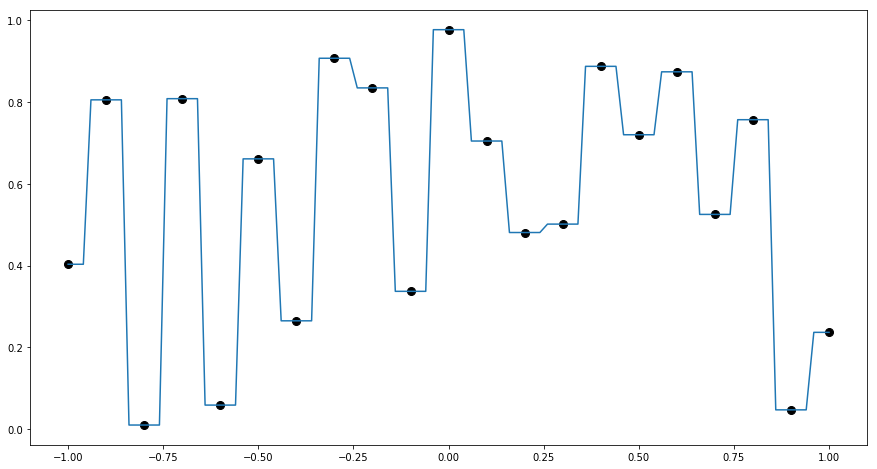

(101,)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Original "data set" --- 21 random numbers between -1 and 1.
x0 = np.linspace(-1,1,21)
y0 = np.random.random(21)


plt.subplots(figsize=(15,8))
plt.plot(x0, y0, 'o', label='Data',color='black',markersize=8)

# Array with points in between those of the data set for interpolation.
x = np.linspace(-1,1,101)


 #('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 5)
f = interp1d(x0,y0,kind='nearest')
plt.plot(x,f(x),)
plt.show()
x.shape

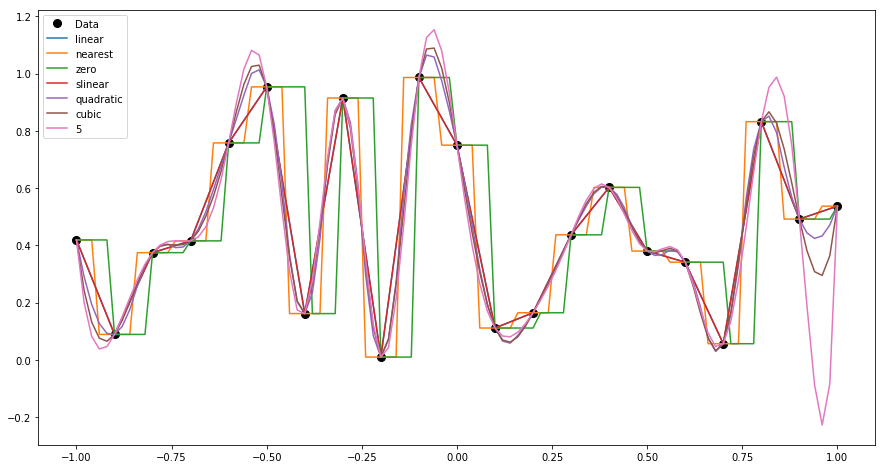

In [17]:
plt.subplots(figsize=(15,8))
plt.plot(x0, y0, 'o', label='Data',color='black',markersize=8)

# Options for interp1d
options = ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',5)

for o in options:
    f = interp1d(x0, y0, kind=o)    # interpolation function
    plt.plot(x, f(x), label=o)      # plot of interpolated data

plt.legend()
plt.show()

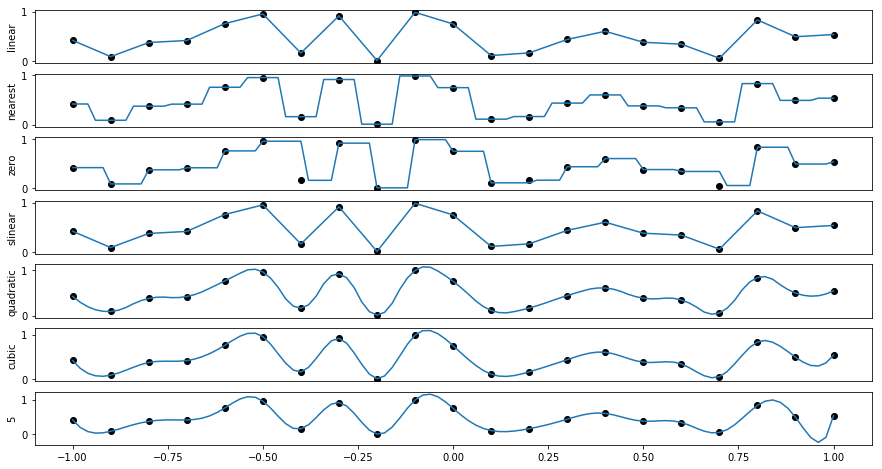

In [18]:
t = ['linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 5]

plt.figure(figsize=(15,8))
axx = 1
for o in t:
    plt.subplot(len(t),1,axx)
    f = interp1d(x0, y0, kind=o)    # interpolation function
    plt.plot(x0, y0, label='Data',marker='o',color='black',linestyle='')
    plt.plot(x, f(x), label=o,)      # plot of interpolated data
    plt.ylabel(o)
    axx += 1
    if axx!=len(t)+1:
        plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.show()


# Gyakorlás

In [26]:
FILE1 = 'process_data_cut.xlsx'
FILE2 = 'lab_data_cut.xlsx'


pr_dat = pd.read_excel(FILE1)
pr_dat = pr_dat.interpolate(method='linear')
pr_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24023 entries, 0 to 24022
Data columns (total 9 columns):
Date                    24023 non-null float64
BD product              24023 non-null float64
Kapacitás%              24023 non-null float64
C4/C5 bottom product    24023 non-null float64
T-45 reflux             24023 non-null float64
T-45 reflux ratio       24023 non-null float64
V-45 level              24023 non-null float64
T-45 bottom pressure    24023 non-null float64
T-45 head pressure      24023 non-null float64
dtypes: float64(9)
memory usage: 1.6 MB


In [35]:
lab_dat = pd.read_excel(FILE2)


dimer1 = lab_dat[['Date','Dimer (SC-461)']]
dimer1=dimer1.dropna()

f_dimer1 = interp1d(dimer1['Date'],dimer1['Dimer (SC-461)'],kind='linear',fill_value='extrapolate')

In [36]:
dimer1_i = f_dimer1(pr_dat['Date'])